
Training with optimizer: adam


D:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Training Time: 4.39s
Training Accuracy: 0.9137
Testing Accuracy:  0.8650
Sample Predictions: [0.77 0.93 0.57 0.13 0.83]

Training with optimizer: sgd
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Training Time: 3.59s
Training Accuracy: 0.7500
Testing Accuracy:  0.6900
Sample Predictions: [0.25 0.4  0.6  0.1  0.49]

Training with optimizer: rmsprop
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Training Time: 4.19s
Training Accuracy: 0.8700
Testing Accuracy:  0.7700
Sample Predictions: [0.99 0.74 0.74 0.26 0.3 ]

Training with optimizer: adamax
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Training Time: 4.02s
Training Accuracy: 0.7362
Testing Accuracy:  0.6750
Sample Predictions: [0.65 0.65 0.63 0.55 0.47]


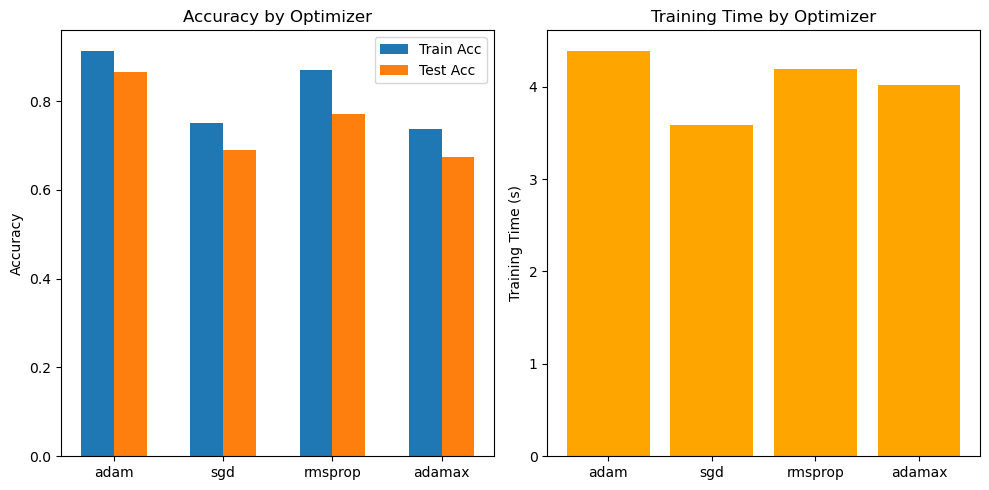

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adam

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build model with a given optimizer
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(6, input_dim=10, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Optimizers to try
optimizers = {
    'adam': Adam(),
    'sgd': SGD(),
    'rmsprop': RMSprop(),
    'adamax': Adamax()
}

results = {}

# Train and evaluate each model
for name, opt in optimizers.items():
    print(f"\nTraining with optimizer: {name}")
    model = create_model(opt)

    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    end_time = time.time()

    train_time = end_time - start_time
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    preds = model.predict(X_test[:5]).flatten()

    print(f"Training Time: {train_time:.2f}s")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    print("Sample Predictions:", np.round(preds, 2))

    results[name] = {
        'train_time': train_time,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'predictions': preds
    }

# Plotting Accuracy and Training Time
labels = list(results.keys())
train_accuracies = [results[k]['train_acc'] for k in labels]
test_accuracies = [results[k]['test_acc'] for k in labels]
train_times = [results[k]['train_time'] for k in labels]

x = np.arange(len(labels))
width = 0.3

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x - width/2, train_accuracies, width, label='Train Acc')
plt.bar(x + width/2, test_accuracies, width, label='Test Acc')
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Accuracy by Optimizer')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(labels, train_times, color='orange')
plt.ylabel('Training Time (s)')
plt.title('Training Time by Optimizer')
plt.tight_layout()
plt.show()
